<table style="width:100%;">
    <tr>
        <td style="width:80%; text-align:left; vertical-align: center;">
            <img src="./Header/ETH_Logo.svg" alt="ETH logo" align="left" vspace="4">
        </td>
        <td style="width:20%; text-align:left; vertical-align: top;">
            Biochemical Engineering Lab<br/>
            Prof. Dr. P. Arosio<br/>
            <img src="./Header/DCHAB_Logo.png" alt="DCHAB logo" align="left" vspace="-50"
             style="width:150px; margin: -12px 0px 0px -20px;">
        </td>
    </tr>
</table>

<center> 
    <h1>Biochemical and Polymer Reaction Engineering: Exercise 1</h1>
    <h3>by Eduard Meier</h3>
</center>

<center> 
<img src="./Header/Header.jpg" alt="Polymers" style="width: 800px;"/>
</center>

This Jupyter Notebooks contains a presentation of the applied equations, all code (main script and various functions) used to solve the exercise as well as the resulting plots. It belongs to the course "Biochemical and Polymer Reaction Engineering", held by Prof. Arosio in the autumn semester 2022. References to equations inside the lecture script are indicated on the left side of the corresponding equations and refer to the equation number in the lecture script.

# Cumulative Length Distribution
## Equations

The following system of ODEs can be developed based on the given reaction scheme:

\begin{align}
  \frac{\mathrm{d}[\text{I}_2]}{\mathrm{d}t} &= - k_d [\text{I}_2]  \\
  \frac{\mathrm{d}[\text{M}]}{\mathrm{d}t} &= - (k_{p} + k_{fm})[\text{M}] [\text{R}] \equiv - R_p \\
  (1.5) \;\;\;\;\;\; \frac{\mathrm{d}[\text{R}]}{\mathrm{d}t} &= 2 f k_d [\text{I}_2] - (k_{tc} + k_{td})[\text{R}]^2 \\
  (1.37) \;\;\;\; \frac{\mathrm{d}[\text{P}_n]}{\mathrm{d}t} &= R_p \frac{\alpha}{(1+\alpha)^n} \left[ \gamma + \frac{1}{2} (n-1) \alpha \beta \right] \\
  (1.63) \;\;\;\;\;\; \frac{\mathrm{d}[\text{P}]}{\mathrm{d}t} &= R_p \left( \gamma + \frac{\beta}{2} \right)  \\
\end{align}

in which there appear additional constants - $\alpha$, $\beta$ and $\gamma$ - defined as

\begin{align}
    (1.34) \;\;\;\;\;\; \gamma &= \frac{k_{fm}}{k_p} + \frac{k_{td}[\text{R}]}{k_p[\text{M}]} \\
    (1.35) \;\;\;\;\;\; \beta &= \frac{k_{tc}[\text{R}]}{k_p[\text{M}]} \\
    (1.36) \;\;\;\;\;\; \alpha &= \beta + \gamma \; .\\
\end{align}

Furthermore, the following expressions hold for the rate constants (accounting for diffusion limitations): 

\begin{align}
    (Ex) \;\;\;\;\;\; k_p &= \frac{1}{\frac{1}{k_{p,0}} + \frac{\exp{(C_\eta w_p)}}{k_{pD,0}} } \\
    (Ex) \;\;\;\;\;\;\; k_t &= \frac{1}{\frac{1}{k_{t,0}} + \frac{\exp{(C_\eta w_p)}}{k_{tD,0}} } + C_{RD}k_p(1-w_p) \\[5pt]
    (Ex) \;\;\;\; k_{fm} &= k_p \cdot C_{fm} \\[5pt]
    (Ex) \;\;\;\;\; k_{td} &= \frac{k_t}{1 + \frac{1}{C_t}} \\[5pt]
    (Ex) \;\;\;\;\; k_{tc} &= k_t - k_{td} \\
\end{align}

To compute above expressions, information on the polymer weight fraction, $w_p\equiv \frac{m_p}{m_{tot}}$, is required. Neglecting the mass of initiator, we get

\begin{align}
    m_{tot} &=  m_S + m_M = \rho_S V_S + \rho_M V_M \\[5pt]
    V_{M} &=  \frac{ V_{tot} [M] M_{m,M}}{\rho_M} \\[5pt]
    V_{S} &= V_{tot} - V_{M} \\
\end{align}

for the total mass, which can be calculated from the respective initial monomer and solvent volumes, as indicated above. However, since the polymer density, $\rho_p$, and volume, $V_p$, are not known, the instantaneous polymer weight, $m_p$, cannot be calculated in a similar fashion to above, and thus also the polymer weight fraction, $w_p$, cannot be easily calculated and a different route has to be taken. 

\begin{align}
   w_p = \frac{V_{tot} \sum_{n=1}^{\infty}[P_n]\cdot n \cdot M_M}{m_{tot}} \approx \frac{V_{tot} \cdot [P] \cdot \bar{n} \cdot M_M}{m_{tot}}
\end{align}

The instantaneous CLD ($f_N$) and its moments ($\mu_j$) are calculated via:

\begin{align}
    (1.38) \;\;\;\;\; f_N &= \frac{\frac{\mathrm{d}[P_n]}{\mathrm{d}t}}{\frac{\mathrm{d}[P]}{\mathrm{d}t}} \\[5pt]
     (1.45) \;\;\;\;\; \mu_j &= \sum_{n=1}^{\infty} n^j f_N (n)
\end{align}

Furthermore, the following ODEs are used to determine the moments of the cumulative CLD ($\mu_j^c$):

\begin{align}
    (1.71) \;\;\;\;\; \frac{\mathrm{d}(\mu_0^c [P])}{\mathrm{d}t} &= \mu_0 \frac{\mathrm{d}[P]}{\mathrm{d}t} \\[5pt]
    (1.71) \;\;\;\;\; \frac{\mathrm{d}(\mu_1^c [P])}{\mathrm{d}t} &= \mu_1 \frac{\mathrm{d}[P]}{\mathrm{d}t} \\[5pt]
    (1.71) \;\;\;\;\; \frac{\mathrm{d}(\mu_2^c [P])}{\mathrm{d}t} &= \mu_2 \frac{\mathrm{d}[P]}{\mathrm{d}t} \\[5pt]
\end{align}

and in addition the cumulative CLD as well as number- and weight averages and the dispersity can be calculated from

\begin{align}
    (1.59) \;\;\;\;\; f_N^c(n,t) &= \frac{[P_n](t)}{[P](t)} \\[5pt]
    (1.49) \;\;\;\;\; f_W^c(n,t) &= \frac{n f_N^c(n,t)}{\mu_1^c} = \frac{n [P_n](t)}{\mu_1^c [P](t)} \\[5pt] 
    (1.68) \;\;\;\;\; \bar{n}_N^c &= \frac{\mu_1^c}{\mu_0^c} \\[5pt]
    (1.69) \;\;\;\;\; \bar{n}_W^c &= \frac{\mu_2^c}{\mu_1^c} \\[5pt]
    (1.70) \;\;\;\;\;\; \sigma^c &= \frac{\mu_2^c \mu_0^c}{(\mu_1^c)^2}
\end{align}

Finally, the conversion is defined as

\begin{align}
    X_M &= \frac{[M]_0 - [M]}{[M]_0}
\end{align}

# Plots and Discussion
## Part a) 
$C_{fm} = 0$ and $C_{t} = 1000$

As $C_{t} \equiv \frac{k_{td}}{k_{tc}} \gg 1$, termination by disproportionation is the dominating termination mechanism, and since $C_{fm} \equiv \frac{k_{fm}}{k_{p}} = 0$, chain transfer to momoner is negligible compared to propagation.

<center> 
    <img src="./Plot1.pdf" alt="Polymers" style="width: 450px;"/>
</center>
</br>
<center> 
    <t>Figure 1: Monomer conversion as a function of time. </t>
</center>


Figure 1 shows the time evolution of the conversion of monomers for the studied process. As can be seen, the conversion at first linearly increases with time, however, after a few hours, an exponential increase in conversion over time is observed, which can be attributed to the gel effect. Finally, a deceleration of the conversion per time is observed and a conversion of $X_M = 1$ is reached in the form of a horizontal asymptote.

<center> 
<img src="./Plot3.pdf" alt="Polymers" style="width: linewidth;"/>
 <img src="./Plot2.pdf" alt="Polymers" style="width: linewidth;"/>
</center>
<center> 
</br>
    <t>Figures 2-5: Cumulative CLDs as functions of polymerization degree and cumulative means and polydispersity as functions of conversion. </t>
</center>


Figures 2-3 show the cumulative number-weighted and cumulative weight-weighted CLDs, $f_N^c$ and $f_W^c$, of the considered process, calculated at four different conversions betwen 0.1 and 0.9. While the cumulative number-weighted CLD appears very similar for all considered conversions, the cumulative weight-weighted CLD increases its mean and variances when increasing the conversion (and thus over time). Thus, the cumulative number-weighted average of the CLD, $\bar{n}_N^c$, stays very similar, while the cumulative weight-weighted average of the CLD, $\bar{n}_W^c$, increases significantly over the course of the polymerization. The cumulative number-weighted average can be interpreted as the total polymer mass ($\sim \mu_1$) divided by the number of dead polymer chains ($\sim \mu_0$). It steadily but slowly increases before it suddenly decreases at the very end. The overall increase makes sense as longer polymer chains can only be formed after "seeding" (initial formation of short active polymers) has taken place, and thus initially (low conversion) the averages will be lower and increase with conversion. The sudden decrease at very high conversions may be explained by the increase in viscosity and the small amount of remaining monomers, which implies that termination by disproportionation becomes increasingly likely compared to propagation and thus remaining small chains will not grow by much anymore. The cumulative weight-weighted average, on the other hand, is comparable to the number-weighted average and only differs in the fact that it is weighted by the corresponding weight fractions. Therefore, longer chains will be have a larger weight in the calculation of the average and thus the increase at $X_M = 0.5$ is more pronounced for the weight-weighted average.

Finally, the cumulative polydispersity also increases over time and thus the cumulative CLDs get broader. The cumulative polydispersity exhibiting a sharp increase at the very end of the polymerization may be explained by the argumentation elaborated for the cumulative number average molecular weight. The short polymer chains formed at the end broaden the chain length distribution. Previous remarks can easily be seen in Fig. 4-5.

<center> 
<img src="./Plot4.pdf" alt="Polymers" style="width: linewidth;"/>
</center>
    </br>
<center>
    <t>Figures 6-7: Cumulative CLDs as a function of conversion. </t>
</center>

Figures 6-7 again show the cumulative number- and weight-weighted CLDs, however, this time they are scaled by the polymerization degree, $n$, and plotted over a logarithmic x-axis. In this form, the differences at differences are more pronounced and can thus be more easily recognized. In Figure 2, the cumulative number-weighted CLDs looked almost identical for different conversions, while in Figure 6, a decrease in height and increase in variance is clearly visible at higher conversions. The positions of the maximum of the cumulative number-weighted CLD does not significantly change and the mean is approximately constant. Thus, the overall number of polymers does not change significantly over the course of the polymerization. However, for the cumulative weight-weighted CLD, Figure 7 again clearly represents the shift of both the mean weight as well as the dispersity to higher values. The shortness of the resulting dead chains (in average $n \approx 10$) and the fact that almost no chains with $n>100$ are observed can be rationalized by the fact that termination by disproportionation dominates (since termination by combination would lead to longer chain lengths through combination of two active chain ends) and furthermore no chain transfer to polymer is considered in the present reaction scheme (which would reactivate dead chains and thus lead to a longer mean chain length).

## Part b)
As in a) we assume $C_{fm} = 0$ and $C_{t} = 1000$

As $C_{t} \equiv \frac{k_{td}}{k_{tc}} \gg 1$, termination by disproportionation is the dominating termination mechanism, and since $C_{fm} \equiv \frac{k_{fm}}{k_{p}} = 0$, chain transfer to momoner is negligible compared to propagation.

<center> 
<img src="./Plot5.pdf" alt="Polymers" style="width: linewidth;"/>
</center>
<center> 
</br>
    <t>Figures 8-9: Cumulative averages and polydispersity as a function of conversion. </t>
</center>

Despite the same assumptions on the kinetics dominating the process, the initial conditions were changed for this task compared to a), implying an increased initial rate of propagation and a fewer amount of initiator being present in the reaction mixture. Figure 8 displays the evolution of the cumulative number-weighted and weight-weighted averages of the CLD (i.e. average chain lengths). In Figure 9, the cumulative polydispersity is displayed as a function of monomer conversion. In general, the shape of the curves closely resembles the ones from task a). However, the averages and the polydispersity change less significantly with conversion (i.e. they appear flatter). In addition, the polymers attain significantly larger sizes with the adjusted initial conditions (i.e. a lower amount of initiator used and higher initial rate constant for propagation). Consequently, after complete conversion of the monomer, the cumulative averages reach values of roughly 1600 and 3500, which are two orders of magnitude higher than the values from task a). From the lecture notes we know that the following scaling holds for the cumulative averages of the CLD $\bar{n}^c \sim 1/\gamma \sim [M]$ and thus, the sudden decrease in the cumulative averages at high conversions can be traced back to the small concentrations of monomers present. The cumulative polydispersity has a similar shape to the one in task a) but has a flatter shape. Again, at the very high conversions, the dispersity rises sharply, which can be attributed to the favored formation of short dead polymer chains at the end of the polymerization.

## Part c)
Now, we assume $C_{fm} = 0$ and $C_{t} = 0.001$

As $C_{t} \equiv \frac{k_{td}}{k_{tc}} \ll 1$, termination by combination is the dominating termination mechanism, and since $C_{fm} \equiv \frac{k_{fm}}{k_{p}} = 0$, chain transfer to momoner is negligible compared to propagation.

<center> 
<img src="./Plot6.pdf" alt="Polymers" style="width: linewidth;"/>
</center>
<center> 
</br>
    <t>Figures 10-11: Cumulative averages and polydispersity as a function of conversion. </t>
</center>

Unlike before, termination by combination now dominates and thus the chain length of the dead polymer chains is expected to increase compared to task b), where termination happened primarily via disproportionation. For example, the combination of two active chains of length $n$ now leads to a dead chain of length $2n$, while before termination did not affect the chain length. As a consequence, both cumulative averages of the CLD attain higher values than in task b) and furthermore the cumulative polydispersity (and thus the width of the CLD) is reduced compared to task b). This observation is also a consequence of the termination by combination, which averages out chain lengths due to combination of two active polymer chains. Nevertheless, the qualitative shape of both the cumulative averages and the cumulative polydispersity closely resembles the one from previous tasks.

## Part d)
Now, we assume $C_{fm} = 0.01$ and $C_{t} = 1000$

As $C_{t} \equiv \frac{k_{td}}{k_{tc}} \gg 1$, again termination by disproportionation is the dominating termination mechanism, and since $C_{fm} \equiv \frac{k_{fm}}{k_{p}} = 0.01$, chain transfer to momoner now also constitutes a relevant pathway, which leads to dead polymer chains as well as a reactive monomer.

<center> 
<img src="./Plot7.pdf" alt="Polymers" style="width: linewidth;"/>
</center>
<center> 
</br>
    <t>Figures 12-13: Cumulative averages and polydispersity as a function of conversion. </t>
</center>

Although the same initial conditions as in tasks b)-c) have been used, the cumulative averages of the CLD attain significantly lower values (i.e. one order of magnitude lower than in the previous tasks. Since again termination by combination is negligible, the cumulative dispersity takes on a higher value than in task c) (i.e. the CLD is broader). In addition, the general qualitative shape of both the cumulative averages and the cumulative polydispersity has significantly altered and they feature an extermely flat profile over the whole monomer conversion range. This can be attributed to the chain transfer to monomer pathway, which counteracts the formation of long polymer chains (which before mostly set in at $X_M = 0.5$) and thus the cumulative averages stay the same during the course of the polymerization. 

## Part e)

Generally, we assume mass to be conserved during the polymerization. Therefore the expressions to arrive at the total mass are still valid at the beginning of the polymerization:

\begin{align}
    m_{tot} &=  m_S + m_M^0 = \rho_S V_S + \rho_M V_M^0 \\[5pt]
    V_{M}^0 &=  \frac{ V_{tot}^0 [M]^0 M_{m,M}}{\rho_M} \\[5pt]
    V_{S} &= V_{tot}^0 - V_{M}^0 \\
\end{align}

The total volume, however, can change during the course of the polymerization, since chemical conversions take place and generally, the densities of educts and products differ. This fact is even more pronounced in the case of polymerization, where long polymer chains, consisting of a large number of monomer building blocks, are formed. Neglecting the volume of initiators, we thus get

\begin{align}
V_{\mathrm{tot}} &= V_{\mathrm{M}} + V_{\mathrm{P}} +  V_{\mathrm{S}} \;\; \text{where } V_{\mathrm{S}}=\mathrm{const.} \\[5pt]
\implies \frac{\mathrm{d}V_{\mathrm{tot}}}{\mathrm{d}t} &= \frac{\mathrm{d}V_{\mathrm{M}}}{\mathrm{d}t} + \frac{\mathrm{d}V_{\mathrm{P}}}{\mathrm{d}t}
\end{align}

where the volume of solvent, $V_{\mathrm{S}}$, was assumed to be constant. Therefore, to track the change in total volume, the following set of differential equations has to be included in the system of ODEs that is numerically evaluated:

\begin{align}
\frac{\mathrm{d}V_{\mathrm{M}}}{\mathrm{d}t} &= \frac{\mathrm{d}[M]}{\mathrm{d}t} \frac{M_M V_{\mathrm{tot}}}{\rho_M} \\[5pt]
\frac{\mathrm{d}V_{\mathrm{P}}}{\mathrm{d}t} &= \frac{\mathrm{d}[P]}{\mathrm{d}t} \frac{\bar{n}^c M_M V_{\mathrm{tot}}}{\rho_P}
\end{align}


From the solutions of the instantaneous polymer and monomer volumes, the total volume and thus the polymer weight fraction can be calculated for every point in time. To solve above set of ODEs, the following initial conditions have to be incorporated: $V_{\text{tot}}^0 = 20$ L, $V_\mathrm{M}^0 = V_{\text{tot}}^0 − V_{\text{S}} = 10 $ L and $V_{\text{P}}^0 = 0$ L.

## Part f)

The shape and properties of a (probability) distribution are summarized in terms of moments of different orders. While they may not be sufficient to fully reconstruct a distribution, they still give valuable quantitative information about its position and shape. Mathematically, the first four moments can be connected to a certain shape feature of the distribution:
- 0th-order moment: content (integral) of the entire distribution, i.e. 1 for a probability distribution
- 1st-order moment: mean (average) of the distribution, i.e. where the distribution is centered
- 2nd-order moment: variance of the distribution, i.e. how broad the distribution is
- 3rd-order moment: skweness of the distribution, i.e. how asymmetric the distribution is
- 4th-order moment: kurtosis of the distribution, i.e. how flat the distribution is

Various experimental exist to characterize the number-weighted average molar mass and the weight-weighted average molar mass of a polymer. Since these average quantities are given by division of moments of different order of the CLD, these measurement techniques also give information about the moments of the CLD. Examples include:
- NMR end group analysis ($\rightarrow$ number-weighted average molar mass)
- Vapor pressure osmometry ($\rightarrow$ number-weighted average molar mass)
- Membrane osmometry ($\rightarrow$ number-weighted average molar mass)
- Light scattering ($\rightarrow$ weight-weighted average molar mass)
- Small angle neutron scattering ($\rightarrow$ weight-weighted average molar mass)
- AFM contour length analysis ($\rightarrow$ entire CLD)
- MALDI TOF MS ($\rightarrow$ entire CLD)

# Python Code

In [1]:
# Import libraries and other preliminaries

import numpy as np                   # Import numerical python library
import matplotlib as mpl             # Import python mathematical plotting library
import matplotlib.pyplot as plt      # Import python mathematical plotting library
from scipy.integrate import solve_ivp # Import solver for (system of coupled) ODEs
mpl.rc('text', usetex=False)         # Don't use LaTeX font in plots, as this yields errors in the Juno App on iPad

np.set_printoptions(threshold=10) # View only 10 elements of arrays
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Define global (initial) parameter values given in the instructions

k_d = 6.77e-6   # initiator dissociation rate constant [s^-1]
k_t0 = 9.2e6    # initial termination rate constant [mol L^-1 s^-1]

M_M = 100       # molar mass of monomer [g mol^-1]
M_S = 78        # molar mass of solvent [g mol^-1]
M_I = 164       # molar mass of initiator [g mol^-1]

rho_M = 0.94e3    # density of monomer [g L^-1]
rho_S = 0.88e3    # density of solvent [g L^-1]

eff = 0.5         # initiator efficiency [-]

k_pD0 = 2e11    # initial rate constant used in diff-lim rate expression [mol L^-1 s^-1]
k_tD0 = 5e8     # initial rate constant used in diff-lim rate expression [mol L^-1 s^-1]
C_eta = 25      # constant used in diff-lim rate expression [-]
C_RD = 180      # constant used in diff-lim rate expression [-]

V_tot = 20      # total reactor volume [L]

In [3]:
def odesystem(t, y, k_p0, C_fm, C_t, Pn_eval, n):
    """
    Return a right-hand side (RHS) vector of the system of ODEs to be solved.
    ODEs are written in the following form: dy/dt = f(y, t) = RHS
    The following system of coupled ODEs is considered (fn according to above):
    dI2/dt = ...
    dM/dt = ...
    dR/dt = ...
    dP/dt = ...
    dPn/dt = ...
    dmu0cP/dt = ...
    dmu1cP/dt = ...
    dmu2cP/dt = ...
    dwp/dt = ...
    and thus y = [I2, M, R, P, mu0cP, mu1cP, mu2cP, Pn]
    """
    # Declare global variables
    global k_d, k_t0, M_M, M_S, M_I, rho_M, rho_S, eff, k_pD0, k_tD0, C_eta, C_RD, V_tot, m_tot
            
    # Read-out current variable values (first time = initial condition)
    c_I = y[0] # = I
    c_M = y[1] # = M
    c_R = y[2] # = R
    c_P = y[3] # = P
    mu0cP = y[4]
    mu1cP = y[5]
    mu2cP = y[6]
    c_Pn = y[7:] # = Pn (all elements starting from element 7)
        
    # Update changing variables
    n_avg = mu1cP/mu0cP
    #w_p = V_tot*np.sum(c_Pn*n*M_M) / m_tot
    w_p = V_tot*c_P*n_avg*M_M / m_tot
     
    k_p = 1 / (1/k_p0 + np.exp(C_eta*w_p)/k_pD0)
    k_t = 1 / (1/k_t0 + np.exp(C_eta*w_p)/k_tD0) + C_RD*k_p*(1-w_p)
    k_fm = k_p*C_fm
    k_td = k_t / (1 + 1/C_t)
    k_tc = k_t - k_td
    
    gamma = k_fm/k_p + k_td*c_R/k_p/c_M
    beta = k_tc*c_R/k_p/c_M
    alpha = beta + gamma
    
    # Kinetic rate expressions
    dI_dt = - k_d * c_I
    dM_dt = -(k_p + k_fm) * c_M * c_R
        
    R_p = -dM_dt
    
    dR_dt = 2*eff*k_d*c_I - (k_tc + k_td)*c_R**2
    dP_dt = R_p * (gamma + beta/2)
    dPn_dt = R_p * alpha/np.power((1+alpha),n) * (gamma + 1/2*(n-1)*alpha*beta)

    # Additional expressions
    f_N = dPn_dt / dP_dt
    mu0 = np.sum(np.power(n, 0) * f_N)
    mu1 = np.sum(np.power(n, 1) * f_N)
    mu2 = np.sum(np.power(n, 2) * f_N)
    
    dmu0cP_dt = mu0 * dP_dt
    dmu1cP_dt = mu1 * dP_dt
    dmu2cP_dt = mu2 * dP_dt
    #dw_p_dt = R_p * V_tot * M_M / m_tot 
        
    """
    A collection of print statements to check convergence:
    print('y = ' ,y)
    print('wp = ', w_p)
    
    print('kp = ', k_p)
    print('kpt = ', k_t)
    print('kfm = ', k_fm)
    print('ktd = ', k_td)
    print('ktc = ', k_tc)
        
    print('gamma = ', gamma)
    print('beta = ', beta)
    print('alpha = ', alpha)
    
    print('dI_dt = ', dI_dt)
    print('dM_dt = ', dM_dt)
    
    print('dR_dt = ', dR_dt)
    print('dP_dt = ', dP_dt)
    print('dPn_dt = ', dPn_dt)
        
    print('length dPn_dt = ', len(dPn_dt))
    #print('f_N = ', f_N)
    print('mu0 = ', mu0)
    print('mu1 = ', mu1)
    print('mu2 = ', mu2)
    
    print('dmu0cP_dt = ', dmu0cP_dt)
    print('dmu1cP_dt = ', dmu1cP_dt)
    print('dmu2cP_dt = ', dmu2cP_dt)
    """
    odesys = [dI_dt, dM_dt, dR_dt, dP_dt, dmu0cP_dt, dmu1cP_dt, dmu2cP_dt]
    
    if Pn_eval:
        odesys = np.append(odesys, dPn_dt)
    
    return odesys

In [4]:
def solve_ode(param, n):
    """
    Solve the system of coupled ODEs
    """
    global m_tot
    
    # Read-out and set initial conditions
    c_I0 = param[0]
    c_M0 = param[1]
    c_R0 = 1e-10
    c_P0 = 1e-10
    c_Pn0 = 1e-10 * np.ones(len(n))
    # Note: as nN_avg = nW_avg = 1 at the beginning, we have mu0 = mu1 = mu2
    mu0cP0 = 1e-10 # = mu0c * c_P0 is approx. zero as c_P0 = 0
    mu1cP0 = 1e-10 # = mu1c * c_P0 is approx. zero as c_P0 = 0
    mu2cP0 = 1e-10 # = mu2c * c_P0 is approx. zero as c_P0 = 0
    
    m_tot = rho_S*(V_tot-V_tot*c_M0*M_M/rho_M) + rho_M*V_tot*c_M0*M_M/rho_M
    
    # Read-out other parameters
    k_p0 = param[2]
    C_fm = param[3]
    C_t = param[4]
    Pn_eval = param[5]
    
    # Define initial condition vector
    y0 = [c_I0, c_M0, c_R0, c_P0, mu0cP0, mu1cP0, mu2cP0]
    
    if Pn_eval:
        y0 = np.append(y0, c_Pn0)
        
    # Define time limits
    tlimits = [0, 1.5e4]
    trange = np.arange(0, 1.5e4+1, 1)
    
    # Define additional ODE parameters
    param_ODE = [k_p0, C_fm, C_t]
    
    # Solve system of ODEs (use Radau method for stiff problems)
    return solve_ivp(odesystem, tlimits, y0, args=(k_p0, C_fm, C_t, Pn_eval, n), method='Radau', t_eval=trange)

In [5]:
# Solve ODEs for initial conditions and parameter values of part a)

c_I0 = 6.0      # initial initiator concentration [mol L^-1]
c_M0 = 4.7      # initial monomer concentration [mol L^-1]

k_p0 = 25       # initial polymerization rate constant [L mol^-1 s^-1]

C_fm = 0        # rate constant ratio [-]
C_t = 1e3       # rate constant ratio [-]

Pn_eval = 1     # Include c_Pn (for all n) in the ODE system

param1 = [c_I0, c_M0, k_p0, C_fm, C_t, Pn_eval]

n = np.arange(1, 1e3+1, 1)      # Define array of polymerization degrees
                                # Note: python stops 1 unit before Nmax = 1e3
Y = solve_ode(param1, n)

t = Y.t                         # Time [s]
c_I = Y.y[0]                    # Initiator concentration [mol L^-1]
c_M = Y.y[1]                    # Monomer concentration [mol L^-1]
X_M = (c_M[0] - c_M) / c_M[0]   # Monomer conversion [-]
c_R = Y.y[2]                    # Initiator concentration [mol L^-1]
c_P = Y.y[3]                    # Radical concentration [mol L^-1]   
mu0cP = Y.y[4]                  # Zero-order moment [-]
mu1cP = Y.y[5]                  # First-order moment [-]
mu2cP = Y.y[6]                  # Second-order moment [-]
c_Pn = Y.y[7:,:]

print('tmax = ', Y.t[-1])
print('X_M = ', X_M)

tmax =  15000.0
X_M =  [0.00000000e+00 5.10426264e-05 1.04037762e-04 ... 9.99999995e-01
 9.99999995e-01 9.99999995e-01]


In [6]:
def find_nearest(array, value):
    """
    Find nearest element to given value in given array
    """
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [7]:
# Find indices in arrays corresponding to X = 0.1, 0.4, 0.7, 0.9

id1 = find_nearest(X_M, 0.1)    # Find index of element in X_M closest to 0.1
id2 = find_nearest(X_M, 0.4)    # Find index of element in X_M closest to 0.4
id3 = find_nearest(X_M, 0.7)    # Find index of element in X_M closest to 0.7
id4 = find_nearest(X_M, 0.9)    # Find index of element in X_M closest to 0.9

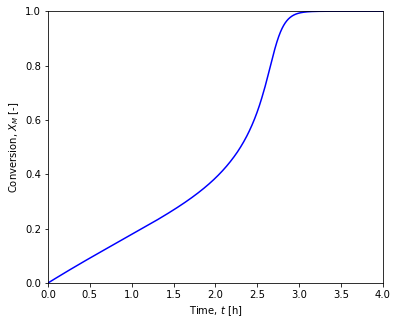

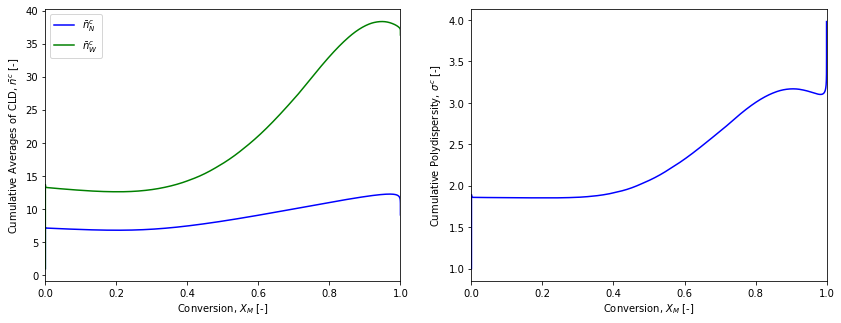

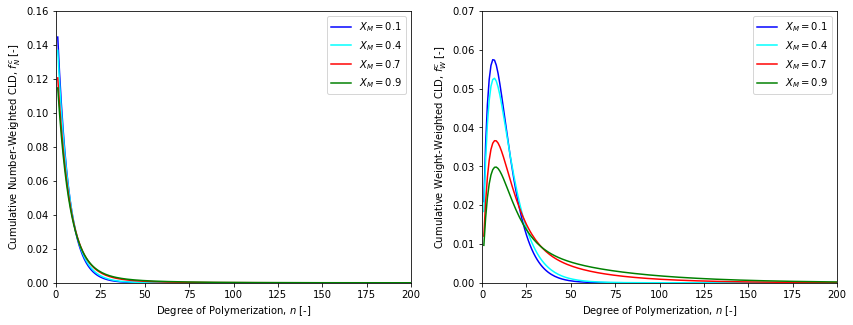

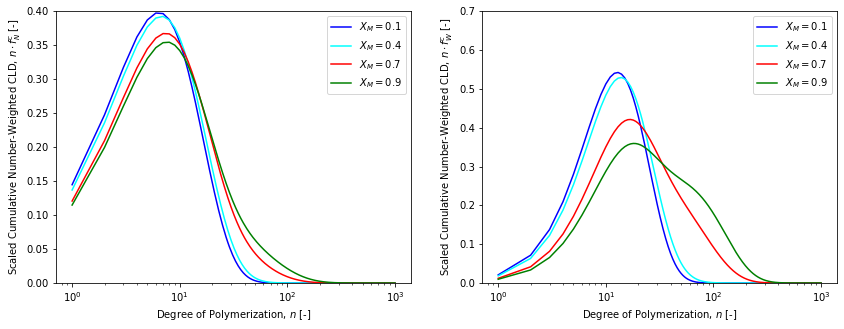

In [8]:
# Plot results

# Plot figure 1
fig, axs = plt.subplots(nrows=1, ncols=1, figsize = (6,5)) # Create figure with one plot
plot = axs.plot(t/3600, X_M, color='b')      # Create plot of X_M [-] vs. t [h]
axs.set_xlabel('Time, $t$ [h]')   # Add x-axis label to plot
axs.set_ylabel('Conversion, $X_M$ [-]')  # Add y-axis label to plot
axs.set_xlim([0, 4])
axs.set_ylim([0, 1])
plt.savefig('Plot1.pdf')  

# Plot figures 2 & 3
fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (14,5)) # Create figure with one plot
plot = axs[0].plot(X_M, mu1cP/mu0cP, color='b', label=r'$\bar{n}_N^c$')      # Create plot of nN_avg [-] vs. X [-]
plot2 = axs[0].plot(X_M, mu2cP/mu1cP, color='g', label=r'$\bar{n}_W^c$')      # Create plot of nW_avg [-] vs. X [-]
axs[0].set_xlabel('Conversion, $X_M$ [-]')   # Add x-axis label to plot
axs[0].set_ylabel('Cumulative Averages of CLD, 'r'$\bar{n}^c$ [-]')  # Add y-axis label to plot
axs[0].legend()
axs[0].set_xlim([0, 1])
plot3 = axs[1].plot(X_M, mu2cP*mu0cP/mu1cP/mu1cP, color='b')  # Create plot of sigma [-] vs. X [-]
axs[1].set_xlabel('Conversion, $X_M$ [-]')   # Add x-axis label to plot
axs[1].set_ylabel('Cumulative Polydispersity, 'r'$\sigma^c$ [-]')  # Add y-axis label to plot
axs[1].set_xlim([0, 1])
plt.savefig('Plot2.pdf')  

# Plot figures 4 & 5
fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (14,5)) # Create figure with one plot
plot = axs[0].plot(n, c_Pn[:, id1]/c_P[id1], color='b', label=r'$X_M=0.1$')  # Create plot of f_N^c [-] vs. n [-]
plot2 = axs[0].plot(n, c_Pn[:, id2]/c_P[id2], color='cyan', label=r'$X_M=0.4$')  # Create plot of f_N^c [-] vs. n [-]
plot3 = axs[0].plot(n, c_Pn[:, id3]/c_P[id3], color='r', label=r'$X_M = 0.7$')  # Create plot of f_N^c [-] vs. n [-]
plot4 = axs[0].plot(n, c_Pn[:, id4]/c_P[id4], color='g', label=r'$X_M = 0.9$')  # Create plot of f_N^c [-] vs. n [-]
axs[0].set_xlabel('Degree of Polymerization, $n$ [-]')   # Add x-axis label to plot
axs[0].set_ylabel('Cumulative Number-Weighted CLD, 'r'$f_N^c$ [-]')  # Add y-axis label to plot
axs[0].legend()
axs[0].set_xlim([0, 200])
axs[0].set_ylim([0, 0.16])
plot21 = axs[1].plot(n, np.multiply(n,c_Pn[:, id1])/mu1cP[id1], color='b', label=r'$X_M=0.1$')  # Create plot of f_N^c [-] vs. n [-]
plot22 = axs[1].plot(n, np.multiply(n,c_Pn[:, id2])/mu1cP[id2], color='cyan', label=r'$X_M=0.4$')  # Create plot of f_N^c [-] vs. n [-]
plot23 = axs[1].plot(n, np.multiply(n,c_Pn[:, id3])/mu1cP[id3], color='r', label=r'$X_M = 0.7$')  # Create plot of f_N^c [-] vs. n [-]
plot24 = axs[1].plot(n, np.multiply(n,c_Pn[:, id4])/mu1cP[id4], color='g', label=r'$X_M = 0.9$')  # Create plot of f_N^c [-] vs. n [-]
axs[1].set_xlabel('Degree of Polymerization, $n$ [-]')   # Add x-axis label to plot
axs[1].set_ylabel('Cumulative Weight-Weighted CLD, 'r'$f_W^c$ [-]')  # Add y-axis label to plot
axs[1].legend()
axs[1].set_xlim([0, 200])
axs[1].set_ylim([0, 0.07])
plt.savefig('Plot3.pdf')  

# Plot figures 6 & 7
fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (14,5)) # Create figure with one plot
plot = axs[0].plot(n, np.multiply(c_Pn[:, id1]/c_P[id1], n), color='b', label=r'$X_M=0.1$')  # Create plot of f_N^c [-] vs. n [-]
plot2 = axs[0].plot(n, np.multiply(c_Pn[:, id2]/c_P[id2], n), color='cyan', label=r'$X_M=0.4$')  # Create plot of f_N^c [-] vs. n [-]
plot3 = axs[0].plot(n, np.multiply(c_Pn[:, id3]/c_P[id3], n), color='r', label=r'$X_M = 0.7$')  # Create plot of f_N^c [-] vs. n [-]
plot4 = axs[0].plot(n, np.multiply(c_Pn[:, id4]/c_P[id4], n), color='g', label=r'$X_M = 0.9$')  # Create plot of f_N^c [-] vs. n [-]
axs[0].set_xlabel('Degree of Polymerization, $n$ [-]')   # Add x-axis label to plot
axs[0].set_ylabel('Scaled Cumulative Number-Weighted CLD, 'r'$n \cdot f_N^c$ [-]')  # Add y-axis label to plot
axs[0].legend()
axs[0].set_xscale('log')
axs[0].set_ylim([0, 0.4])
plot21 = axs[1].plot(n, np.multiply(np.multiply(n,c_Pn[:, id1])/mu1cP[id1], n), color='b', label=r'$X_M=0.1$')  # Create plot of f_N^c [-] vs. n [-]
plot22 = axs[1].plot(n, np.multiply(np.multiply(n,c_Pn[:, id2])/mu1cP[id2], n), color='cyan', label=r'$X_M=0.4$')  # Create plot of f_N^c [-] vs. n [-]
plot23 = axs[1].plot(n, np.multiply(np.multiply(n,c_Pn[:, id3])/mu1cP[id3], n), color='r', label=r'$X_M = 0.7$')  # Create plot of f_N^c [-] vs. n [-]
plot24 = axs[1].plot(n, np.multiply(np.multiply(n,c_Pn[:, id4])/mu1cP[id4], n), color='g', label=r'$X_M = 0.9$')  # Create plot of f_N^c [-] vs. n [-]
axs[1].set_xlabel('Degree of Polymerization, $n$ [-]')   # Add x-axis label to plot
axs[1].set_ylabel('Scaled Cumulative Number-Weighted CLD, 'r'$n \cdot f_W^c$ [-]')  # Add y-axis label to plot
axs[1].legend()
axs[1].set_xscale('log')
axs[1].set_ylim([0, 0.7])
plt.savefig('Plot4.pdf')  

In [9]:
# Solve ODEs for initial conditions and parameter values of part b)

w_I0 = 0.01     # initial initiator weight fraction [-]
c_M0 = 4.7      # initial monomer concentration [mol L^-1]

k_p0 = 620       # initial polymerization rate constant [L mol^-1 s^-1]

m_tot0 = rho_S*(V_tot-c_M0*M_M/rho_M) + rho_M*c_M0*M_M/rho_M # initial total mass [g]
m_I0 = w_I0 * m_tot0 # initial initiator mass [g]
c_I0 = m_I0 / V_tot / M_I  # initial initiator concentration [mol L^-1]

C_fm = 0        # rate constant ratio [-]
C_t = 1e3       # rate constant ratio [-]

Pn_eval = 0     # don't include c_Pn (for all n) in the ODE system

n2 = np.arange(1, 1e4+1, 1)      # Define array of polymerization degrees
                                 # Note: python stops 1 unit before Nmax = 1e3
    
param2 = [c_I0, c_M0, k_p0, C_fm, C_t, Pn_eval]
    
Y2 = solve_ode(param2, n2)

t = Y2.t                         # Time [s]
c_I = Y2.y[0]                    # Initiator concentration [mol L^-1]
c_M = Y2.y[1]                    # Monomer concentration [mol L^-1]
X_M = (c_M[0] - c_M) / c_M[0]   # Monomer conversion [-]
c_R = Y2.y[2]                    # Initiator concentration [mol L^-1]
c_P = Y2.y[3]                    # Radical concentration [mol L^-1]   
mu0cP = Y2.y[4]                  # Zero-order moment [-]
mu1cP = Y2.y[5]                  # First-order moment [-]
mu2cP = Y2.y[6]                  # Second-order moment [-]

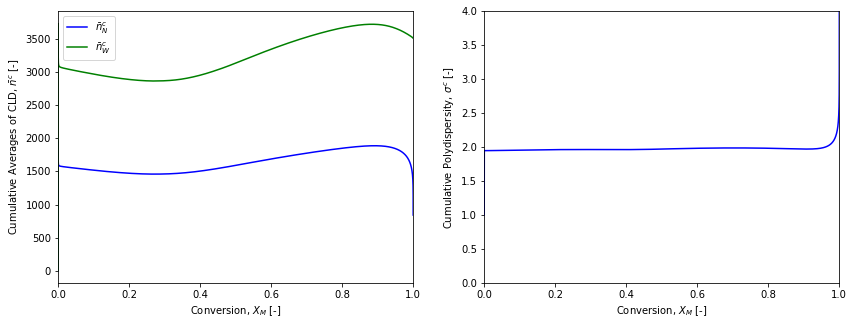

In [10]:
# Plot figures 8 & 9
fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (14,5)) # Create figure with one plot
plot = axs[0].plot(X_M, mu1cP/mu0cP, color='b', label=r'$\bar{n}_N^c$')      # Create plot of nN_avg [-] vs. X [-]
plot2 = axs[0].plot(X_M, mu2cP/mu1cP, color='g', label=r'$\bar{n}_W^c$')      # Create plot of nW_avg [-] vs. X [-]
axs[0].set_xlabel('Conversion, $X_M$ [-]')   # Add x-axis label to plot
axs[0].set_ylabel('Cumulative Averages of CLD, 'r'$\bar{n}^c$ [-]')  # Add y-axis label to plot
axs[0].legend()
axs[0].set_xlim([0, 1])
plot3 = axs[1].plot(X_M, mu2cP*mu0cP/mu1cP/mu1cP, color='b')  # Create plot of sigma [-] vs. X [-]
axs[1].set_xlabel('Conversion, $X_M$ [-]')   # Add x-axis label to plot
axs[1].set_ylabel('Cumulative Polydispersity, 'r'$\sigma^c$ [-]')  # Add y-axis label to plot
axs[1].set_xlim([0, 1])
axs[1].set_ylim([0, 4])
plt.savefig('Plot5.pdf')  

In [11]:
# Solve ODEs for initial conditions and parameter values of part c)

w_I0 = 0.01     # initial initiator weight fraction [-]
c_M0 = 4.7      # initial monomer concentration [mol L^-1]

k_p0 = 620       # initial polymerization rate constant [L mol^-1 s^-1]

m_tot0 = rho_S*(V_tot-c_M0*M_M/rho_M) + rho_M*c_M0*M_M/rho_M # initial total mass [g]
m_I0 = w_I0 * m_tot0 # initial initiator mass [g]
c_I0 = m_I0 / V_tot / M_I # initial initiator concentration [mol L^-1]

C_fm = 0        # rate constant ratio [-]
C_t = 1e-3      # rate constant ratio [-]

Pn_eval = 0     # don't include c_Pn (for all n) in the ODE system

n3 = np.arange(1, 1e4+1, 1)      # Define array of polymerization degrees
                                 # Note: python stops 1 unit before Nmax = 1e3
    
param3 = [c_I0, c_M0, k_p0, C_fm, C_t, Pn_eval]
    
Y3 = solve_ode(param3, n3)

t = Y3.t                         # Time [s]
c_I = Y3.y[0]                    # Initiator concentration [mol L^-1]
c_M = Y3.y[1]                    # Monomer concentration [mol L^-1]
X_M = (c_M[0] - c_M) / c_M[0]   # Monomer conversion [-]
c_R = Y3.y[2]                    # Initiator concentration [mol L^-1]
c_P = Y3.y[3]                    # Radical concentration [mol L^-1]   
mu0cP = Y3.y[4]                  # Zero-order moment [-]
mu1cP = Y3.y[5]                  # First-order moment [-]
mu2cP = Y3.y[6]                  # Second-order moment [-]

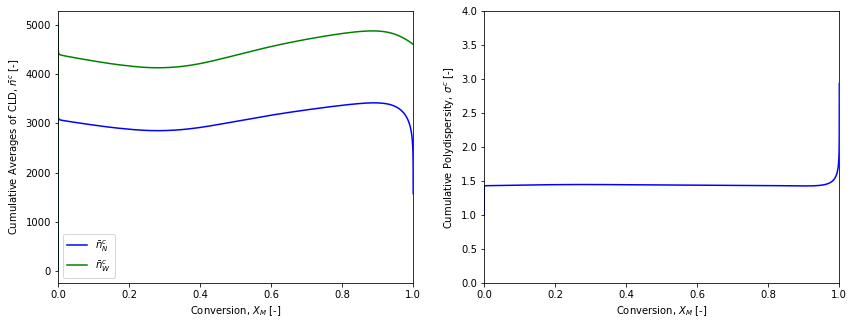

In [12]:
# Plot figures 10 & 11
fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (14,5)) # Create figure with one plot
plot = axs[0].plot(X_M, mu1cP/mu0cP, color='b', label=r'$\bar{n}_N^c$')      # Create plot of nN_avg [-] vs. X [-]
plot2 = axs[0].plot(X_M, mu2cP/mu1cP, color='g', label=r'$\bar{n}_W^c$')      # Create plot of nW_avg [-] vs. X [-]
axs[0].set_xlabel('Conversion, $X_M$ [-]')   # Add x-axis label to plot
axs[0].set_ylabel('Cumulative Averages of CLD, 'r'$\bar{n}^c$ [-]')  # Add y-axis label to plot
axs[0].legend()
axs[0].set_xlim([0, 1])
plot3 = axs[1].plot(X_M, mu2cP*mu0cP/mu1cP/mu1cP, color='b')  # Create plot of sigma [-] vs. X [-]
axs[1].set_xlabel('Conversion, $X_M$ [-]')   # Add x-axis label to plot
axs[1].set_ylabel('Cumulative Polydispersity, 'r'$\sigma^c$ [-]')  # Add y-axis label to plot
axs[1].set_xlim([0, 1])
axs[1].set_ylim([0, 4])
plt.savefig('Plot6.pdf') 

In [13]:
# Solve ODEs for initial conditions and parameter values of part d)

w_I0 = 0.01     # initial initiator weight fraction [-]
c_M0 = 4.7      # initial monomer concentration [mol L^-1]

k_p0 = 620       # initial polymerization rate constant [L mol^-1 s^-1]

m_tot0 = rho_S*(V_tot-c_M0*M_M/rho_M) + rho_M*c_M0*M_M/rho_M # initial total mass [g]
m_I0 = w_I0 * m_tot0 # initial initiator mass [g]
c_I0 = m_I0 / V_tot / M_I  # initial initiator concentration [mol L^-1]

C_fm = 1e-2        # rate constant ratio [-]
C_t = 1e3          # rate constant ratio [-]

Pn_eval = 0     # don't include c_Pn (for all n) in the ODE system

n4 = np.arange(1, 1e4+1, 1)      # Define array of polymerization degrees
                                 # Note: python stops 1 unit before Nmax = 1e3
    
param4 = [c_I0, c_M0, k_p0, C_fm, C_t, Pn_eval]
    
Y4 = solve_ode(param4, n4)

t = Y4.t                         # Time [s]
c_I = Y4.y[0]                    # Initiator concentration [mol L^-1]
c_M = Y4.y[1]                    # Monomer concentration [mol L^-1]
X_M = (c_M[0] - c_M) / c_M[0]   # Monomer conversion [-]
c_R = Y4.y[2]                    # Initiator concentration [mol L^-1]
c_P = Y4.y[3]                    # Radical concentration [mol L^-1]   
mu0cP = Y4.y[4]                  # Zero-order moment [-]
mu1cP = Y4.y[5]                  # First-order moment [-]
mu2cP = Y4.y[6]                  # Second-order moment [-]

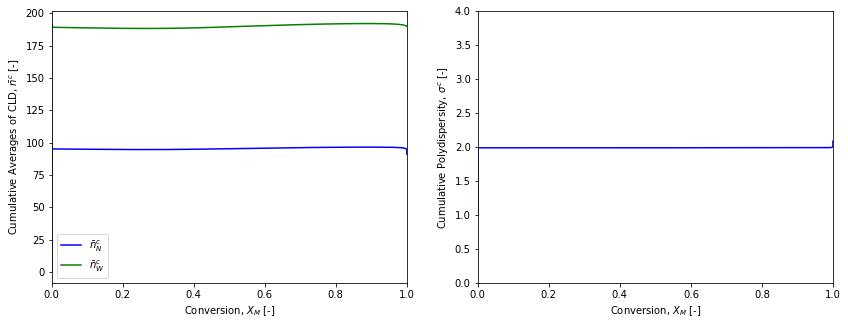

In [14]:
# Plot figures 12 & 13
fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (14,5)) # Create figure with one plot
plot = axs[0].plot(X_M, mu1cP/mu0cP, color='b', label=r'$\bar{n}_N^c$')      # Create plot of nN_avg [-] vs. X [-]
plot2 = axs[0].plot(X_M, mu2cP/mu1cP, color='g', label=r'$\bar{n}_W^c$')      # Create plot of nW_avg [-] vs. X [-]
axs[0].set_xlabel('Conversion, $X_M$ [-]')   # Add x-axis label to plot
axs[0].set_ylabel('Cumulative Averages of CLD, 'r'$\bar{n}^c$ [-]')  # Add y-axis label to plot
axs[0].legend()
axs[0].set_xlim([0, 1])
plot3 = axs[1].plot(X_M, mu2cP*mu0cP/mu1cP/mu1cP, color='b')  # Create plot of sigma [-] vs. X [-]
axs[1].set_xlabel('Conversion, $X_M$ [-]')   # Add x-axis label to plot
axs[1].set_ylabel('Cumulative Polydispersity, 'r'$\sigma^c$ [-]')  # Add y-axis label to plot
axs[1].set_xlim([0, 1])
axs[1].set_ylim([0, 4])
plt.savefig('Plot7.pdf') 